In [50]:
%run 'Load & Clean Rumor'.ipynb

File Name                                             Modified             Size
emergent.csv                                   2019-09-20 11:24:30      1681978
politifact.csv                                 2019-09-20 11:24:30      1745905
snopes.csv                                     2019-09-20 11:24:30      6191626



Rumor Citation Emergent:
Index(['emergent_page', 'claim', 'claim_description', 'claim_label', 'tags',
       'claim_source_domain', 'claim_course_url', 'date', 'body',
       'page_domain', 'page_url', 'page_headline', 'page_position',
       'page_shares', 'page_order'],
      dtype='object')

Rumor Citation Politifact:
Index(['politifact_page', 'claim', 'claim_source', 'claim_citation',
       'claim_label', 'date_published', 'researched_by', 'edited_by', 'tags',
       'page_citation', 'page_url', 'page_is_first_citation'],
      dtype='object')

Rumor Citation Snopes:
Index(['snopes_page', 'topic', 'claim', 'claim_label', 'date_published',
       'date_updated', 'p

In [47]:
rumor_dfs_cleaned = rumor_dfs

rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('emergent_page', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('body', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('claim', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('claim_description', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('claim_course_url', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('date', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('page_url', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('page_headline', axis=1)
rumor_dfs_cleaned[0] = rumor_dfs_cleaned[0].drop('page_order', axis=1)
rumor_dfs_cleaned[0].claim_label = rumor_dfs_cleaned[0].claim_label.astype('category').cat.codes

rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('politifact_page', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('claim', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('claim_citation', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('date_published', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('page_citation', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('page_url', axis=1)
rumor_dfs_cleaned[1] = rumor_dfs_cleaned[1].drop('page_is_first_citation', axis=1)
rumor_dfs_cleaned[1].claim_label = rumor_dfs_cleaned[1].claim_label.astype('category').cat.codes

rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('snopes_page', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('claim', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('date_published', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('date_updated', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('page_url', axis=1)
rumor_dfs_cleaned[2] = rumor_dfs_cleaned[2].drop('page_is_first_citation', axis=1)
rumor_dfs_cleaned[2].claim_label = rumor_dfs_cleaned[2].claim_label.astype('category').cat.codes

In [39]:
print(rumor_dfs_cleaned[0].shape, rumor_dfs_cleaned[1].shape, rumor_dfs_cleaned[2].shape)
print(rumor_dfs_cleaned[0].claim_label.value_counts(), rumor_dfs_cleaned[1].claim_label.value_counts(), rumor_dfs_cleaned[2].claim_label.value_counts())

(2144, 5) (2923, 5) (16862, 6)
2    857
1    737
0    550
Name: claim_label, dtype: int64 4    1110
1     731
0     460
2     244
3     207
5     171
Name: claim_label, dtype: int64 0    8765
2    3319
3    2618
5    1480
4     487
6     151
1      42
Name: claim_label, dtype: int64


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

rumor_one_hots = []

mlb = MultiLabelBinarizer()
rumor_one_hots.append(rumor_dfs_cleaned[0].drop('tags', axis=1).join(p.DataFrame(mlb.fit_transform(rumor_dfs_cleaned[0].tags),
                          columns=mlb.classes_,
                          index=rumor_dfs[0].index)))
rumor_one_hots.append(rumor_dfs_cleaned[1].drop('tags', axis=1).join(p.DataFrame(mlb.fit_transform(rumor_dfs_cleaned[1].tags),
                          columns=mlb.classes_,
                          index=rumor_dfs[1].index)))
rumor_one_hots.append(rumor_dfs_cleaned[2].drop('tags', axis=1).join(p.DataFrame(mlb.fit_transform(rumor_dfs_cleaned[2].tags),
                          columns=mlb.classes_,
                          index=rumor_dfs[2].index)))

In [17]:
rumor_one_hots[0] = p.get_dummies(data=rumor_one_hots[0], columns=['claim_source_domain', 'page_domain'])
rumor_one_hots[1] = p.get_dummies(data=rumor_one_hots[1], columns=['claim_source','researched_by', 'edited_by'])
rumor_one_hots[2] = p.get_dummies(data=rumor_one_hots[2], columns=['topic'])

In [18]:
rumor_one_hots[0].shape, rumor_one_hots[1].shape, rumor_one_hots[2].shape

((2144, 702), (2923, 340), (16862, 3861))

In [19]:
rumor_one_hots[0].page_shares = rumor_one_hots[0].page_shares.str.replace(',', '')
rumor_one_hots[0].page_shares = rumor_one_hots[0].page_shares.astype('int')
rumor_one_hots[0].page_shares -= rumor_one_hots[0].page_shares.min()/rumor_one_hots[0].page_shares.max()

In [20]:
hot_X_train = [] 
hot_X_test = [] 
hot_y_train = [] 
hot_y_test = []

from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(
     rumor_one_hots[0].drop('claim_label', axis=1), rumor_one_hots[0].claim_label,
    test_size=0.33, random_state=42)

hot_X_train.append(X_tr)
hot_X_test.append(X_te)
hot_y_train.append(y_tr)
hot_y_test.append(y_te)

X_tr, X_te, y_tr, y_te = train_test_split(
     rumor_one_hots[1].drop('claim_label', axis=1), rumor_one_hots[1].claim_label,
    test_size=0.33, random_state=42)

hot_X_train.append(X_tr)
hot_X_test.append(X_te)
hot_y_train.append(y_tr)
hot_y_test.append(y_te)

X_tr, X_te, y_tr, y_te = train_test_split(
     rumor_one_hots[2].drop('claim_label', axis=1), rumor_one_hots[2].claim_label,
    test_size=0.33, random_state=42)

hot_X_train.append(X_tr)
hot_X_test.append(X_te)
hot_y_train.append(y_tr)
hot_y_test.append(y_te)

In [21]:
from matplotlib import pyplot

def chart_importances(grid, columns):
    importance = grid.best_estimator_.coef_[0]
    for i,v in enumerate(importance):
        if v > 0:
            print('Feature: %0d (%s), Score: %.5f' % (i, columns[i],v))
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Emergent:  0.2711864406779661
Feature: 0 (page_shares), Score: 0.00000
Feature: 7 (Airlines), Score: 0.00000
Feature: 10 (Amazon), Score: 0.00000
Feature: 12 (Animals), Score: 0.00000
Feature: 19 (Baby), Score: 0.00000
Feature: 21 (Bill Cosby), Score: 0.00000
Feature: 25 (Boko Haram), Score: 0.00000
Feature: 30 (Brian Williams), Score: 0.00000
Feature: 31 (Bruno Mars), Score: 0.00000
Feature: 37 (Catholic Church), Score: 0.00000
Feature: 39 (Celebrity Deaths), Score: 0.00000
Feature: 47 (Daily Buzz Live), Score: 0.00000
Feature: 49 (Dallas), Score: 0.00000
Feature: 51 (Drugs), Score: 0.00000
Feature: 54 (Ebola), Score: 0.00000
Feature: 57 (Everlast), Score: 0.00000
Feature: 59 (Fake News), Score: 0.00000
Feature: 67 (Fox News), Score: 0.00000
Feature: 68 (Golf), Score: 0.00000
Feature: 70 (Gun Control), Score: 0.00000
Feature: 74 (Harassment), Score: 0.00000
Feature: 75 (Hoaxes), Score: 0.00000
Feature: 76 (Hugh Hefner), Score: 0.00000
Feature: 83 (J.J. Abrams), Score: 0.00000
Feature:

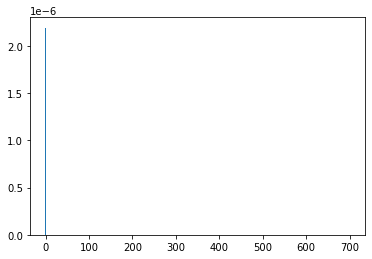

/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

Politifact:  0.9803108808290155
Feature: 2 ( Climate Change), Score: 0.35431
Feature: 13 ( Economy), Score: 0.20645
Feature: 16 ( Energy), Score: 1.00147
Feature: 17 ( Environment), Score: 1.61813
Feature: 28 ( Guns), Score: 0.81427
Feature: 29 ( Health Care), Score: 1.92928
Feature: 30 ( History), Score: 3.11159
Feature: 31 ( Housing), Score: 1.21388
Feature: 34 ( Immigration), Score: 1.14316
Feature: 35 ( Income), Score: 1.54029
Feature: 37 ( Islam), Score: 0.99284
Feature: 38 ( Israel), Score: 3.82103
Feature: 41 ( Labor), Score: 0.26085
Feature: 42 ( Legal Issues), Score: 2.91168
Feature: 45 ( Medicare), Score: 0.62087
Feature: 51 ( Occupy Wall Street), Score: 0.95636
Feature: 62 ( Religion), Score: 2.05664
Feature: 64 ( Science), Score: 2.53868
Feature: 65 ( Social Security), Score: 1.02571
Feature: 70 ( States), Score: 2.14589
Feature: 71 ( Stimulus), Score: 0.73999
Feature: 73 ( Taxes), Score: 2.37685
Feature: 76 ( Trade), Score: 0.93728
Feature: 84 ( Women), Score: 2.19702
Feat

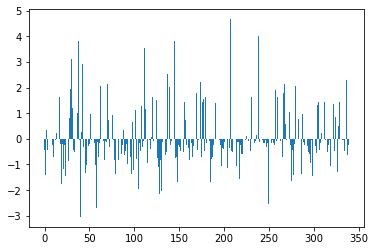

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

lr_grids = []

lr_parameters = {'C':[0.001, 0.01, 0.1, 1, 10]}
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')

cv = KFold(5, shuffle=True)
lr_grids.append(GridSearchCV(lr, param_grid=lr_parameters, cv=cv))
lr_grids.append(GridSearchCV(lr, param_grid=lr_parameters, cv=cv))
lr_grids.append(GridSearchCV(lr, param_grid=lr_parameters, cv=cv))

lr_grids[0].fit(hot_X_train[0], hot_y_train[0])
print("Emergent: ", accuracy_score(lr_grids[0].predict(hot_X_test[0]), hot_y_test[0]))
chart_importances(lr_grids[0], hot_X_train[0].columns)

lr_grids[1].fit(hot_X_train[1], hot_y_train[1])
print("Politifact: ", accuracy_score(lr_grids[1].predict(hot_X_test[1]), hot_y_test[1]))
chart_importances(lr_grids[1], hot_X_train[1].columns)

# too many columns - takes too long
#lr_grids[2].fit(hot_X_train[2], hot_y_train[2])
#print("Snopes: ", accuracy_score(lr_grids[2].predict(hot_X_test[2]), hot_y_test[2]))

In [23]:
def drop_features(grid, df):
    importance = grid.best_estimator_.coef_[0]
    dropped = 0
    for i,v in enumerate(importance):
        if (abs(v) < 0.5):
            df = df.drop(df.columns[i-dropped], axis=1)
            dropped = dropped + 1
    
    return df

In [24]:
#X_train_emerg_drop = drop_features(lr_grids[0], X_train[0])
#X_test_emerg_drop = drop_features(lr_grids[0], X_test[0])

#lr_grids[0].best_estimator_.fit(X_train_emerg_drop, y_train[0])
#print("Emergent: ", accuracy_score(lr_grids[0].best_estimator_.predict(X_test_emerg_drop), 
#                                                       y_test[0]))

X_train_poli_drop = drop_features(lr_grids[1], hot_X_train[1])
X_test_poli_drop = drop_features(lr_grids[1],hot_X_test[1])

lr_grids[1].best_estimator_.fit(X_train_poli_drop, hot_y_train[1])
print("Politifact: ", accuracy_score(lr_grids[1].best_estimator_.predict(X_test_poli_drop), 
                                                       hot_y_test[1]))

Politifact:  0.9202072538860103


/Users/alexweinstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
print(rumor_dfs[0].columns)
print(rumor_dfs[1].columns)
print(rumor_dfs[2].columns)

rumor_dfs[0] = rumor_dfs[0].drop('tags', axis=1)
rumor_dfs[1] = rumor_dfs[1].drop('tags', axis=1)
rumor_dfs[2] = rumor_dfs[2].drop('tags', axis=1)

rumor_dfs[0] = rumor_dfs[0].astype('category')
rumor_dfs[1] = rumor_dfs[1].astype('category')
rumor_dfs[2] = rumor_dfs[2].astype('category')

X_train = [] 
X_test = [] 
y_train = [] 
y_test = []

from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(
     rumor_dfs[0].drop('claim_label', axis=1), rumor_dfs[0].claim_label,
    test_size=0.33, random_state=42)

X_train.append(X_tr)
X_test.append(X_te)
y_train.append(y_tr)
y_test.append(y_te)

X_tr, X_te, y_tr, y_te = train_test_split(
     rumor_dfs[1].drop('claim_label', axis=1), rumor_dfs[1].claim_label,
    test_size=0.33, random_state=42)

X_train.append(X_tr)
X_test.append(X_te)
y_train.append(y_tr)
y_test.append(y_te)

X_tr, X_te, y_tr, y_te = train_test_split(
     rumor_dfs[2].drop('claim_label', axis=1), rumor_dfs[2].claim_label,
    test_size=0.33, random_state=42)

X_train.append(X_tr)
X_test.append(X_te)
y_train.append(y_tr)
y_test.append(y_te)

Index(['emergent_page', 'claim', 'claim_description', 'claim_label', 'tags',
       'claim_source_domain', 'claim_course_url', 'date', 'body',
       'page_domain', 'page_url', 'page_headline', 'page_shares',
       'page_order'],
      dtype='object')
Index(['politifact_page', 'claim', 'claim_source', 'claim_citation',
       'claim_label', 'date_published', 'researched_by', 'edited_by', 'tags',
       'page_citation', 'page_url', 'page_is_first_citation'],
      dtype='object')
Index(['snopes_page', 'topic', 'claim', 'claim_label', 'date_published',
       'date_updated', 'page_url', 'page_is_example', 'page_is_image_credit',
       'page_is_archived', 'page_is_first_citation', 'tags'],
      dtype='object')
Index(['emergent_page', 'claim', 'claim_description', 'claim_label',
       'claim_source_domain', 'claim_course_url', 'date', 'body',
       'page_domain', 'page_url', 'page_headline', 'page_shares',
       'page_order'],
      dtype='object')
Index(['politifact_page', 'claim', 

In [52]:
from catboost import CatBoostClassifier

classifiers = []

classifiers.append(CatBoostClassifier(l2_leaf_reg=8,
                          learning_rate=0.2,
                          depth=1,
                          boosting_type='Plain',
                          one_hot_max_size=255,
                          cat_features=list(X_train[0].columns)))

classifiers[0].fit(X_train[0], y_train[0])
print(classifiers[0].score(X_test[0], y_test[0]))

classifiers.append(CatBoostClassifier(l2_leaf_reg=8,
                          learning_rate=0.2,
                          depth=1,
                          boosting_type='Plain',
                          one_hot_max_size=255,
                          cat_features=list(X_train[1].columns)))

classifiers[1].fit(X_train[1], y_train[1])
print(classifiers[1].score(X_test[1], y_test[1]))

classifiers.append(CatBoostClassifier(l2_leaf_reg=8,
                          learning_rate=0.2,
                          depth=1,
                          boosting_type='Plain',
                          one_hot_max_size=255,
                          cat_features=list(X_train[2].columns)))

classifiers[2].fit(X_train[2], y_train[2])
print(classifiers[2].score(X_test[2], y_test[2]))

0:	learn: 1.0355224	total: 2.13ms	remaining: 2.13s
1:	learn: 0.9816405	total: 4.12ms	remaining: 2.06s
2:	learn: 0.9435028	total: 7.18ms	remaining: 2.39s
3:	learn: 0.9091207	total: 8.99ms	remaining: 2.24s
4:	learn: 0.8854952	total: 14.7ms	remaining: 2.92s
5:	learn: 0.8596526	total: 17ms	remaining: 2.81s
6:	learn: 0.8377669	total: 18.4ms	remaining: 2.62s
7:	learn: 0.8219470	total: 20.1ms	remaining: 2.49s
8:	learn: 0.8054534	total: 21.4ms	remaining: 2.35s
9:	learn: 0.7848490	total: 23.3ms	remaining: 2.3s
10:	learn: 0.7735054	total: 24.9ms	remaining: 2.23s
11:	learn: 0.7586255	total: 28.5ms	remaining: 2.35s
12:	learn: 0.7522620	total: 30.5ms	remaining: 2.31s
13:	learn: 0.7426193	total: 31.9ms	remaining: 2.25s
14:	learn: 0.7321959	total: 33.4ms	remaining: 2.19s
15:	learn: 0.7235539	total: 34.8ms	remaining: 2.14s
16:	learn: 0.7142327	total: 36ms	remaining: 2.08s
17:	learn: 0.7099581	total: 37.2ms	remaining: 2.03s
18:	learn: 0.7053601	total: 39.5ms	remaining: 2.04s
19:	learn: 0.6988343	total:

283:	learn: 0.4057488	total: 364ms	remaining: 917ms
284:	learn: 0.4055021	total: 365ms	remaining: 916ms
285:	learn: 0.4047901	total: 366ms	remaining: 914ms
286:	learn: 0.4046214	total: 367ms	remaining: 913ms
287:	learn: 0.4043945	total: 369ms	remaining: 911ms
288:	learn: 0.4039070	total: 370ms	remaining: 911ms
289:	learn: 0.4036113	total: 373ms	remaining: 913ms
290:	learn: 0.4033457	total: 374ms	remaining: 912ms
291:	learn: 0.4020758	total: 375ms	remaining: 910ms
292:	learn: 0.4015225	total: 377ms	remaining: 909ms
293:	learn: 0.4013810	total: 378ms	remaining: 907ms
294:	learn: 0.4012458	total: 379ms	remaining: 906ms
295:	learn: 0.4010350	total: 380ms	remaining: 904ms
296:	learn: 0.4008373	total: 381ms	remaining: 903ms
297:	learn: 0.4006464	total: 383ms	remaining: 901ms
298:	learn: 0.4000326	total: 384ms	remaining: 900ms
299:	learn: 0.3996045	total: 386ms	remaining: 902ms
300:	learn: 0.3992103	total: 389ms	remaining: 903ms
301:	learn: 0.3988598	total: 390ms	remaining: 902ms
302:	learn: 

590:	learn: 0.2918428	total: 729ms	remaining: 505ms
591:	learn: 0.2914951	total: 731ms	remaining: 504ms
592:	learn: 0.2913440	total: 732ms	remaining: 502ms
593:	learn: 0.2912519	total: 735ms	remaining: 503ms
594:	learn: 0.2911968	total: 737ms	remaining: 502ms
595:	learn: 0.2910110	total: 738ms	remaining: 500ms
596:	learn: 0.2908971	total: 739ms	remaining: 499ms
597:	learn: 0.2901541	total: 741ms	remaining: 498ms
598:	learn: 0.2900732	total: 742ms	remaining: 497ms
599:	learn: 0.2899641	total: 743ms	remaining: 496ms
600:	learn: 0.2895517	total: 745ms	remaining: 494ms
601:	learn: 0.2893571	total: 746ms	remaining: 493ms
602:	learn: 0.2891386	total: 747ms	remaining: 492ms
603:	learn: 0.2885606	total: 751ms	remaining: 492ms
604:	learn: 0.2884187	total: 753ms	remaining: 492ms
605:	learn: 0.2883427	total: 754ms	remaining: 490ms
606:	learn: 0.2880655	total: 755ms	remaining: 489ms
607:	learn: 0.2879557	total: 756ms	remaining: 487ms
608:	learn: 0.2871692	total: 757ms	remaining: 486ms
609:	learn: 

810:	learn: 0.2411547	total: 1.1s	remaining: 256ms
811:	learn: 0.2410547	total: 1.1s	remaining: 254ms
812:	learn: 0.2409948	total: 1.1s	remaining: 253ms
813:	learn: 0.2407342	total: 1.1s	remaining: 252ms
814:	learn: 0.2405675	total: 1.1s	remaining: 251ms
815:	learn: 0.2403471	total: 1.11s	remaining: 250ms
816:	learn: 0.2399065	total: 1.11s	remaining: 249ms
817:	learn: 0.2398660	total: 1.11s	remaining: 247ms
818:	learn: 0.2398148	total: 1.11s	remaining: 246ms
819:	learn: 0.2397067	total: 1.11s	remaining: 245ms
820:	learn: 0.2395556	total: 1.12s	remaining: 244ms
821:	learn: 0.2391259	total: 1.12s	remaining: 242ms
822:	learn: 0.2390674	total: 1.12s	remaining: 241ms
823:	learn: 0.2389794	total: 1.12s	remaining: 239ms
824:	learn: 0.2389402	total: 1.12s	remaining: 238ms
825:	learn: 0.2385922	total: 1.12s	remaining: 237ms
826:	learn: 0.2385108	total: 1.13s	remaining: 236ms
827:	learn: 0.2378489	total: 1.13s	remaining: 234ms
828:	learn: 0.2376770	total: 1.13s	remaining: 233ms
829:	learn: 0.236

34:	learn: 0.4530209	total: 103ms	remaining: 2.83s
35:	learn: 0.4430805	total: 105ms	remaining: 2.82s
36:	learn: 0.4379910	total: 108ms	remaining: 2.82s
37:	learn: 0.4341173	total: 111ms	remaining: 2.81s
38:	learn: 0.4274714	total: 116ms	remaining: 2.87s
39:	learn: 0.4192445	total: 120ms	remaining: 2.87s
40:	learn: 0.4124981	total: 124ms	remaining: 2.89s
41:	learn: 0.4093906	total: 126ms	remaining: 2.87s
42:	learn: 0.4003780	total: 130ms	remaining: 2.88s
43:	learn: 0.3944156	total: 132ms	remaining: 2.88s
44:	learn: 0.3940753	total: 135ms	remaining: 2.85s
45:	learn: 0.3861245	total: 137ms	remaining: 2.84s
46:	learn: 0.3800768	total: 139ms	remaining: 2.82s
47:	learn: 0.3775378	total: 141ms	remaining: 2.8s
48:	learn: 0.3746014	total: 145ms	remaining: 2.81s
49:	learn: 0.3710232	total: 148ms	remaining: 2.81s
50:	learn: 0.3651816	total: 150ms	remaining: 2.79s
51:	learn: 0.3613805	total: 152ms	remaining: 2.77s
52:	learn: 0.3569422	total: 154ms	remaining: 2.75s
53:	learn: 0.3521742	total: 156m

248:	learn: 0.2828601	total: 673ms	remaining: 2.03s
249:	learn: 0.2828458	total: 676ms	remaining: 2.03s
250:	learn: 0.2827874	total: 683ms	remaining: 2.04s
251:	learn: 0.2827724	total: 688ms	remaining: 2.04s
252:	learn: 0.2827560	total: 691ms	remaining: 2.04s
253:	learn: 0.2827415	total: 698ms	remaining: 2.05s
254:	learn: 0.2827192	total: 703ms	remaining: 2.05s
255:	learn: 0.2826257	total: 705ms	remaining: 2.05s
256:	learn: 0.2825493	total: 707ms	remaining: 2.04s
257:	learn: 0.2825147	total: 716ms	remaining: 2.06s
258:	learn: 0.2811519	total: 720ms	remaining: 2.06s
259:	learn: 0.2811222	total: 722ms	remaining: 2.05s
260:	learn: 0.2811147	total: 727ms	remaining: 2.06s
261:	learn: 0.2810842	total: 731ms	remaining: 2.06s
262:	learn: 0.2810709	total: 734ms	remaining: 2.06s
263:	learn: 0.2810231	total: 736ms	remaining: 2.05s
264:	learn: 0.2809743	total: 742ms	remaining: 2.06s
265:	learn: 0.2809444	total: 748ms	remaining: 2.06s
266:	learn: 0.2809152	total: 751ms	remaining: 2.06s
267:	learn: 

412:	learn: 0.2698510	total: 1.24s	remaining: 1.77s
413:	learn: 0.2698325	total: 1.25s	remaining: 1.76s
414:	learn: 0.2698188	total: 1.25s	remaining: 1.76s
415:	learn: 0.2697805	total: 1.25s	remaining: 1.76s
416:	learn: 0.2697313	total: 1.26s	remaining: 1.76s
417:	learn: 0.2692032	total: 1.26s	remaining: 1.76s
418:	learn: 0.2691680	total: 1.27s	remaining: 1.76s
419:	learn: 0.2691487	total: 1.27s	remaining: 1.75s
420:	learn: 0.2691287	total: 1.27s	remaining: 1.75s
421:	learn: 0.2691143	total: 1.27s	remaining: 1.75s
422:	learn: 0.2690957	total: 1.28s	remaining: 1.74s
423:	learn: 0.2690264	total: 1.28s	remaining: 1.74s
424:	learn: 0.2689968	total: 1.28s	remaining: 1.74s
425:	learn: 0.2689656	total: 1.28s	remaining: 1.73s
426:	learn: 0.2689370	total: 1.29s	remaining: 1.73s
427:	learn: 0.2689229	total: 1.29s	remaining: 1.72s
428:	learn: 0.2689091	total: 1.29s	remaining: 1.72s
429:	learn: 0.2688961	total: 1.29s	remaining: 1.72s
430:	learn: 0.2688492	total: 1.3s	remaining: 1.71s
431:	learn: 0

595:	learn: 0.2553736	total: 1.81s	remaining: 1.23s
596:	learn: 0.2553370	total: 1.82s	remaining: 1.23s
597:	learn: 0.2553183	total: 1.82s	remaining: 1.22s
598:	learn: 0.2553028	total: 1.83s	remaining: 1.22s
599:	learn: 0.2552852	total: 1.83s	remaining: 1.22s
600:	learn: 0.2552598	total: 1.83s	remaining: 1.22s
601:	learn: 0.2552286	total: 1.84s	remaining: 1.22s
602:	learn: 0.2551352	total: 1.84s	remaining: 1.21s
603:	learn: 0.2550782	total: 1.85s	remaining: 1.21s
604:	learn: 0.2550565	total: 1.85s	remaining: 1.21s
605:	learn: 0.2550248	total: 1.85s	remaining: 1.21s
606:	learn: 0.2549717	total: 1.86s	remaining: 1.2s
607:	learn: 0.2549095	total: 1.86s	remaining: 1.2s
608:	learn: 0.2549090	total: 1.86s	remaining: 1.2s
609:	learn: 0.2548875	total: 1.87s	remaining: 1.19s
610:	learn: 0.2548692	total: 1.87s	remaining: 1.19s
611:	learn: 0.2548487	total: 1.87s	remaining: 1.19s
612:	learn: 0.2548318	total: 1.88s	remaining: 1.18s
613:	learn: 0.2548190	total: 1.88s	remaining: 1.18s
614:	learn: 0.2

769:	learn: 0.2466918	total: 2.37s	remaining: 709ms
770:	learn: 0.2466635	total: 2.38s	remaining: 706ms
771:	learn: 0.2466098	total: 2.38s	remaining: 703ms
772:	learn: 0.2465909	total: 2.38s	remaining: 699ms
773:	learn: 0.2465802	total: 2.38s	remaining: 696ms
774:	learn: 0.2465688	total: 2.39s	remaining: 693ms
775:	learn: 0.2465247	total: 2.39s	remaining: 690ms
776:	learn: 0.2465165	total: 2.4s	remaining: 688ms
777:	learn: 0.2465104	total: 2.4s	remaining: 685ms
778:	learn: 0.2464519	total: 2.4s	remaining: 682ms
779:	learn: 0.2464369	total: 2.41s	remaining: 679ms
780:	learn: 0.2464134	total: 2.41s	remaining: 676ms
781:	learn: 0.2463990	total: 2.41s	remaining: 673ms
782:	learn: 0.2463502	total: 2.42s	remaining: 670ms
783:	learn: 0.2463039	total: 2.42s	remaining: 668ms
784:	learn: 0.2462937	total: 2.43s	remaining: 665ms
785:	learn: 0.2462648	total: 2.43s	remaining: 661ms
786:	learn: 0.2462513	total: 2.43s	remaining: 658ms
787:	learn: 0.2462509	total: 2.44s	remaining: 655ms
788:	learn: 0.2

954:	learn: 0.2393894	total: 2.94s	remaining: 139ms
955:	learn: 0.2393581	total: 2.94s	remaining: 135ms
956:	learn: 0.2393354	total: 2.94s	remaining: 132ms
957:	learn: 0.2393142	total: 2.95s	remaining: 129ms
958:	learn: 0.2392993	total: 2.95s	remaining: 126ms
959:	learn: 0.2392820	total: 2.96s	remaining: 123ms
960:	learn: 0.2392688	total: 2.96s	remaining: 120ms
961:	learn: 0.2392464	total: 2.96s	remaining: 117ms
962:	learn: 0.2392314	total: 2.97s	remaining: 114ms
963:	learn: 0.2392210	total: 2.97s	remaining: 111ms
964:	learn: 0.2391665	total: 2.97s	remaining: 108ms
965:	learn: 0.2391516	total: 2.97s	remaining: 105ms
966:	learn: 0.2391001	total: 2.98s	remaining: 102ms
967:	learn: 0.2387751	total: 2.98s	remaining: 98.5ms
968:	learn: 0.2387545	total: 2.98s	remaining: 95.5ms
969:	learn: 0.2387411	total: 2.99s	remaining: 92.4ms
970:	learn: 0.2387300	total: 2.99s	remaining: 89.3ms
971:	learn: 0.2387194	total: 2.99s	remaining: 86.2ms
972:	learn: 0.2387191	total: 2.99s	remaining: 83.1ms
973:	l

115:	learn: 0.3271990	total: 1.7s	remaining: 12.9s
116:	learn: 0.3259968	total: 1.72s	remaining: 13s
117:	learn: 0.3259792	total: 1.74s	remaining: 13s
118:	learn: 0.3258544	total: 1.76s	remaining: 13s
119:	learn: 0.3257023	total: 1.78s	remaining: 13s
120:	learn: 0.3255832	total: 1.79s	remaining: 13s
121:	learn: 0.3252429	total: 1.81s	remaining: 13s
122:	learn: 0.3250517	total: 1.82s	remaining: 13s
123:	learn: 0.3249550	total: 1.84s	remaining: 13s
124:	learn: 0.3243737	total: 1.85s	remaining: 13s
125:	learn: 0.3242700	total: 1.86s	remaining: 12.9s
126:	learn: 0.3235446	total: 1.88s	remaining: 12.9s
127:	learn: 0.3229731	total: 1.89s	remaining: 12.9s
128:	learn: 0.3222893	total: 1.91s	remaining: 12.9s
129:	learn: 0.3216630	total: 1.93s	remaining: 12.9s
130:	learn: 0.3216354	total: 1.94s	remaining: 12.9s
131:	learn: 0.3214161	total: 1.96s	remaining: 12.9s
132:	learn: 0.3212491	total: 1.97s	remaining: 12.9s
133:	learn: 0.3210359	total: 1.99s	remaining: 12.8s
134:	learn: 0.3209242	total: 2s

276:	learn: 0.3070850	total: 4.24s	remaining: 11.1s
277:	learn: 0.3069844	total: 4.25s	remaining: 11s
278:	learn: 0.3069642	total: 4.27s	remaining: 11s
279:	learn: 0.3069483	total: 4.29s	remaining: 11s
280:	learn: 0.3069390	total: 4.3s	remaining: 11s
281:	learn: 0.3068973	total: 4.32s	remaining: 11s
282:	learn: 0.3068841	total: 4.33s	remaining: 11s
283:	learn: 0.3068749	total: 4.35s	remaining: 11s
284:	learn: 0.3068722	total: 4.37s	remaining: 11s
285:	learn: 0.3062065	total: 4.38s	remaining: 10.9s
286:	learn: 0.3061808	total: 4.39s	remaining: 10.9s
287:	learn: 0.3061686	total: 4.41s	remaining: 10.9s
288:	learn: 0.3061664	total: 4.42s	remaining: 10.9s
289:	learn: 0.3061519	total: 4.44s	remaining: 10.9s
290:	learn: 0.3054883	total: 4.46s	remaining: 10.9s
291:	learn: 0.3054649	total: 4.48s	remaining: 10.9s
292:	learn: 0.3054506	total: 4.49s	remaining: 10.8s
293:	learn: 0.3054485	total: 4.5s	remaining: 10.8s
294:	learn: 0.3054313	total: 4.52s	remaining: 10.8s
295:	learn: 0.3054195	total: 4

437:	learn: 0.3006808	total: 6.44s	remaining: 8.27s
438:	learn: 0.3006731	total: 6.46s	remaining: 8.26s
439:	learn: 0.3006714	total: 6.48s	remaining: 8.24s
440:	learn: 0.3006596	total: 6.49s	remaining: 8.23s
441:	learn: 0.3006586	total: 6.51s	remaining: 8.21s
442:	learn: 0.3006498	total: 6.52s	remaining: 8.2s
443:	learn: 0.3006435	total: 6.54s	remaining: 8.19s
444:	learn: 0.3006230	total: 6.55s	remaining: 8.17s
445:	learn: 0.3006159	total: 6.56s	remaining: 8.15s
446:	learn: 0.3002982	total: 6.58s	remaining: 8.14s
447:	learn: 0.3002966	total: 6.59s	remaining: 8.12s
448:	learn: 0.3002965	total: 6.61s	remaining: 8.11s
449:	learn: 0.3002806	total: 6.62s	remaining: 8.1s
450:	learn: 0.3002735	total: 6.64s	remaining: 8.08s
451:	learn: 0.2998730	total: 6.66s	remaining: 8.07s
452:	learn: 0.2998661	total: 6.67s	remaining: 8.06s
453:	learn: 0.2998610	total: 6.69s	remaining: 8.04s
454:	learn: 0.2998226	total: 6.7s	remaining: 8.03s
455:	learn: 0.2998118	total: 6.72s	remaining: 8.02s
456:	learn: 0.2

608:	learn: 0.2962569	total: 9.17s	remaining: 5.88s
609:	learn: 0.2962532	total: 9.19s	remaining: 5.88s
610:	learn: 0.2962516	total: 9.21s	remaining: 5.86s
611:	learn: 0.2962444	total: 9.23s	remaining: 5.85s
612:	learn: 0.2962354	total: 9.23s	remaining: 5.83s
613:	learn: 0.2961896	total: 9.25s	remaining: 5.81s
614:	learn: 0.2961879	total: 9.26s	remaining: 5.79s
615:	learn: 0.2961802	total: 9.27s	remaining: 5.78s
616:	learn: 0.2961527	total: 9.28s	remaining: 5.76s
617:	learn: 0.2961514	total: 9.29s	remaining: 5.74s
618:	learn: 0.2961492	total: 9.3s	remaining: 5.72s
619:	learn: 0.2961397	total: 9.31s	remaining: 5.71s
620:	learn: 0.2960946	total: 9.33s	remaining: 5.69s
621:	learn: 0.2960929	total: 9.34s	remaining: 5.67s
622:	learn: 0.2960907	total: 9.35s	remaining: 5.66s
623:	learn: 0.2960877	total: 9.36s	remaining: 5.64s
624:	learn: 0.2959888	total: 9.38s	remaining: 5.63s
625:	learn: 0.2959875	total: 9.39s	remaining: 5.61s
626:	learn: 0.2959830	total: 9.41s	remaining: 5.6s
627:	learn: 0.

775:	learn: 0.2941767	total: 11.7s	remaining: 3.37s
776:	learn: 0.2941605	total: 11.7s	remaining: 3.35s
777:	learn: 0.2941304	total: 11.7s	remaining: 3.34s
778:	learn: 0.2941075	total: 11.7s	remaining: 3.32s
779:	learn: 0.2940984	total: 11.7s	remaining: 3.31s
780:	learn: 0.2940976	total: 11.7s	remaining: 3.29s
781:	learn: 0.2940912	total: 11.8s	remaining: 3.28s
782:	learn: 0.2940805	total: 11.8s	remaining: 3.26s
783:	learn: 0.2940792	total: 11.8s	remaining: 3.25s
784:	learn: 0.2940731	total: 11.8s	remaining: 3.23s
785:	learn: 0.2940628	total: 11.8s	remaining: 3.22s
786:	learn: 0.2940611	total: 11.8s	remaining: 3.2s
787:	learn: 0.2940539	total: 11.8s	remaining: 3.19s
788:	learn: 0.2940528	total: 11.9s	remaining: 3.17s
789:	learn: 0.2940479	total: 11.9s	remaining: 3.16s
790:	learn: 0.2940467	total: 11.9s	remaining: 3.14s
791:	learn: 0.2940368	total: 11.9s	remaining: 3.13s
792:	learn: 0.2940360	total: 11.9s	remaining: 3.11s
793:	learn: 0.2940305	total: 11.9s	remaining: 3.1s
794:	learn: 0.

946:	learn: 0.2924350	total: 14.1s	remaining: 790ms
947:	learn: 0.2924318	total: 14.1s	remaining: 775ms
948:	learn: 0.2924308	total: 14.2s	remaining: 760ms
949:	learn: 0.2924280	total: 14.2s	remaining: 745ms
950:	learn: 0.2924171	total: 14.2s	remaining: 730ms
951:	learn: 0.2924163	total: 14.2s	remaining: 715ms
952:	learn: 0.2924104	total: 14.2s	remaining: 700ms
953:	learn: 0.2924073	total: 14.2s	remaining: 685ms
954:	learn: 0.2924059	total: 14.2s	remaining: 670ms
955:	learn: 0.2924038	total: 14.2s	remaining: 655ms
956:	learn: 0.2924005	total: 14.2s	remaining: 640ms
957:	learn: 0.2923927	total: 14.3s	remaining: 625ms
958:	learn: 0.2923824	total: 14.3s	remaining: 610ms
959:	learn: 0.2923811	total: 14.3s	remaining: 595ms
960:	learn: 0.2923800	total: 14.3s	remaining: 580ms
961:	learn: 0.2923768	total: 14.3s	remaining: 566ms
962:	learn: 0.2923738	total: 14.3s	remaining: 551ms
963:	learn: 0.2923219	total: 14.4s	remaining: 536ms
964:	learn: 0.2923208	total: 14.4s	remaining: 521ms
965:	learn: 

In [55]:
from eli5 import explain_weights_catboost

explain_weights_catboost(classifiers[0])

Weight,Feature
0.6009,page_headline
0.1528,emergent_page
0.0898,claim_source_domain
0.0393,date
0.0365,claim_description
0.0237,claim_course_url
0.0236,body
0.0229,claim
0.0100,page_domain
0.0005,page_order


In [56]:
explain_weights_catboost(classifiers[1])

Weight,Feature
0.3885,politifact_page
0.2826,claim
0.2406,claim_citation
0.0552,date_published
0.0141,researched_by
0.0115,claim_source
0.0074,edited_by
0.0001,page_url
0,page_is_first_citation
0,page_citation


In [57]:
explain_weights_catboost(classifiers[2])

Weight,Feature
0.8977,claim
0.0407,date_published
0.0378,topic
0.0212,date_updated
0.0011,page_is_first_citation
0.0009,page_is_archived
0.0005,page_is_image_credit
0,page_is_example
0,page_url
0,snopes_page
